## PCA on the stacked version data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print(sklearn.__version__)


1.4.2


In [3]:
# Load data
# data = pd.read_csv('all_building_data_stacked.csv')
data = pd.read_csv('daily_data_stacked.csv')
data = data.fillna(method="ffill")
loc = data['location']
data = data.drop(['Unnamed: 0','Time','location'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(['location_label'], axis=1))

# Apply PCA
pca = PCA()
pca.fit(X_scaled)
scores = pca.transform(X_scaled)  # Principal component scores

# Variance explained
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)
x_labels = [f'PC{i+1}' for i in range(len(prop_var))]


In [4]:
data.head()

,outdoor_temp,el,district_heat,bookings,visits,location_label
0,0.366667,36.688889,126.666667,0.0,5.222222,0
1,1.229167,40.350000,122.083333,0.0,10.500000,0
2,3.233333,37.166667,113.333333,0.0,0.000000,0
3,5.408333,36.875000,99.166667,0.0,0.304348,0
4,6.029167,36.091667,95.416667,0.0,1.500000,0


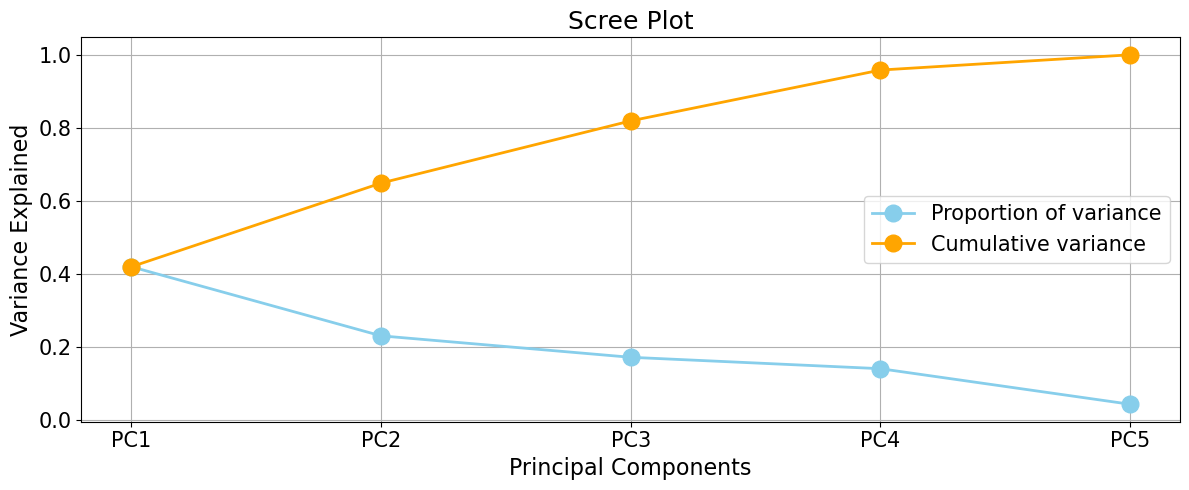

In [5]:
# **1. Scree Plot**
plot = plt.figure(figsize=(12, 5))

ax = plt.gca()  # Get current axes

plt.plot(x_labels, prop_var, marker='o', markersize=12, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', markersize=12, color='orange', linewidth=2, label="Cumulative variance")

ax.set_xlabel('Principal Components', fontsize=16)
ax.set_ylabel('Variance Explained', fontsize=16)
ax.set_title('Scree Plot', fontsize=18)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='center right', fontsize=15)
ax.grid(True)

plt.tight_layout()
plt.show()

plot.savefig("Scree_plot.png", dpi=300, bbox_inches="tight")

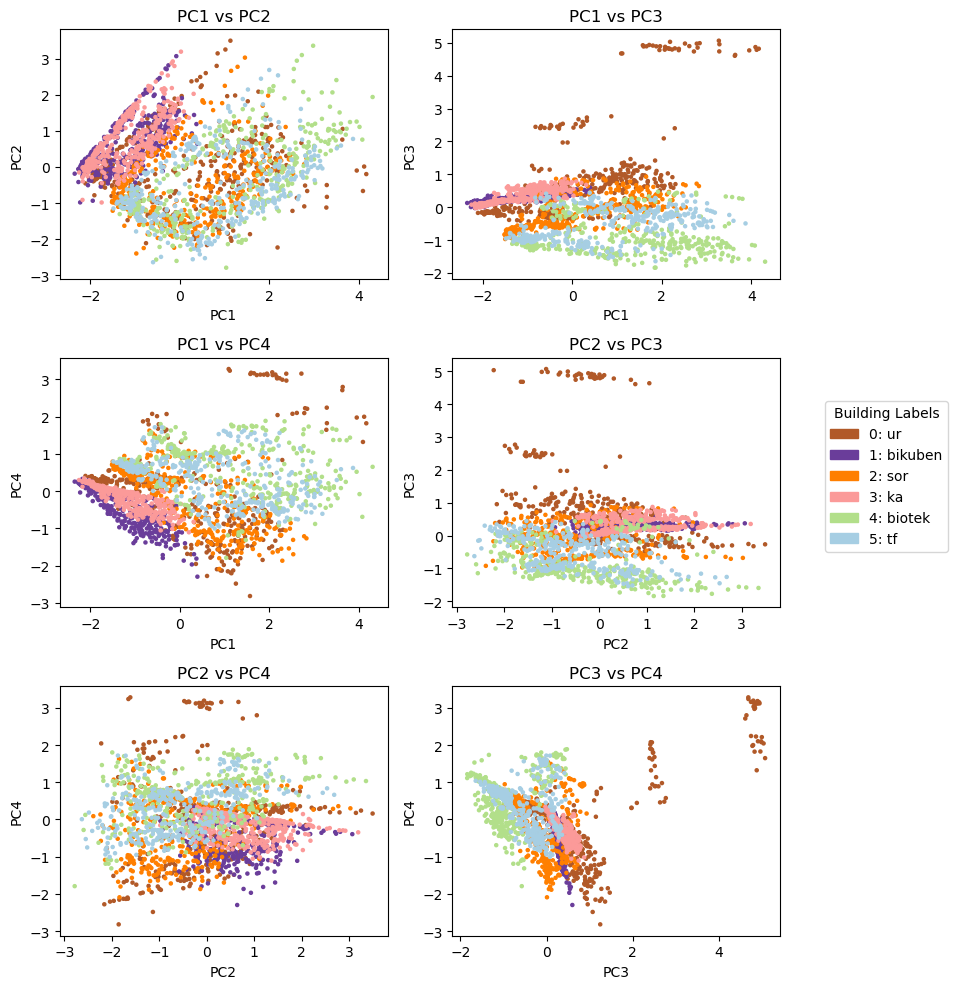

In [6]:
import matplotlib.patches as mpatches

# PCA with 4 components
pca = PCA(n_components=4)
reduced_data_pca = pca.fit_transform(X_scaled)

# Label mapping
label_mapping = {0: "ur",
                 1: "bikuben",
                 2: "sor",
                 3: "ka",
                 4: "biotek",
                 5: "tf"}

# Define PC pairs to plot
pc_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
titles = [f"PC{i+1} vs PC{j+1}" for i, j in pc_pairs]

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# Unique labels and colormap
unique_labels = np.unique(data.location_label)
cmap = plt.get_cmap("Paired_r")
colors = [cmap(i / (len(unique_labels) - 1)) for i in unique_labels]

# Iterate over PC pairs and plot
for idx, (pc_x, pc_y) in enumerate(pc_pairs):
    ax = axes[idx]
    scatter = ax.scatter(reduced_data_pca[:, pc_x], reduced_data_pca[:, pc_y], 
                         c=data.location_label, cmap='Paired_r', s=5)

    ax.set_title(titles[idx])
    ax.set_xlabel(f"PC{pc_x+1}")
    ax.set_ylabel(f"PC{pc_y+1}")
    
# Create a single legend
legend_handles = [mpatches.Patch(color=colors[i], label=f"{i}: {label_mapping[i]}") for i in unique_labels]
fig.legend(handles=legend_handles, loc="upper right", title="Building Labels", bbox_to_anchor=(1.2, 0.6))

# Adjust layout and show plot
fig.tight_layout()
plt.show()

fig.savefig("Pairwise_PC_score_plot.png", dpi=300, bbox_inches="tight")

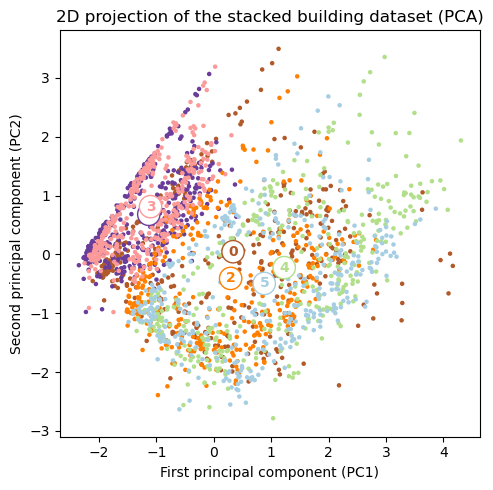

In [7]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
handle = ax.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=data.location_label, cmap='Paired_r', s=5)
ax.set_title("2D projection of the stacked building dataset (PCA)")
ax.set_xlabel("First principal component (PC1)")
ax.set_ylabel("Second principal component (PC2)")

# Add labels with the digit number at the center of each cluster
for i in np.unique(data.location_label):
    xtext, ytext = reduced_data_pca[data.location_label == i].mean(axis=0)
    color = handle.get_cmap()(i/(len(np.unique(data.location_label))-1))
    ax.annotate(
        f"{i}", (xtext, ytext), fontsize=10, fontweight='bold', color=color,
        bbox=dict(facecolor='white', edgecolor=color, boxstyle='circle')
    )

fig.tight_layout()
plt.show()

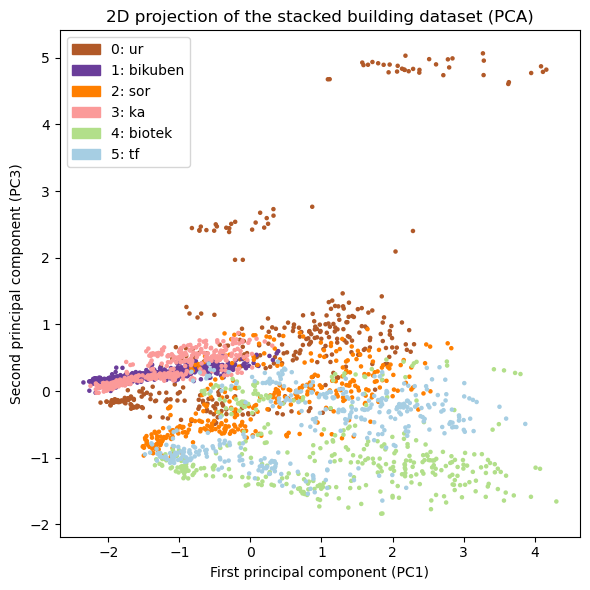

In [8]:
pca = PCA(n_components=4)
reduced_data_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

# Scatter plot with color mapping
handle = ax.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 2], 
                     c=data.location_label, cmap='Paired_r', s=5)

ax.set_title("2D projection of the stacked building dataset (PCA)")
ax.set_xlabel("First principal component (PC1)")
ax.set_ylabel("Second principal component (PC3)")

# Create legend handles with correct colors
unique_labels = np.unique(data.location_label)
colors = [handle.get_cmap()(i / (len(unique_labels) - 1)) for i in unique_labels]

legend_handles = [mpatches.Patch(color=colors[i], label=f"{i}: {label_mapping[i]}") for i in unique_labels]


# Add the updated legend with correct colors
ax.legend(handles=legend_handles, loc="best")

# Show plot
fig.tight_layout()
plt.show()

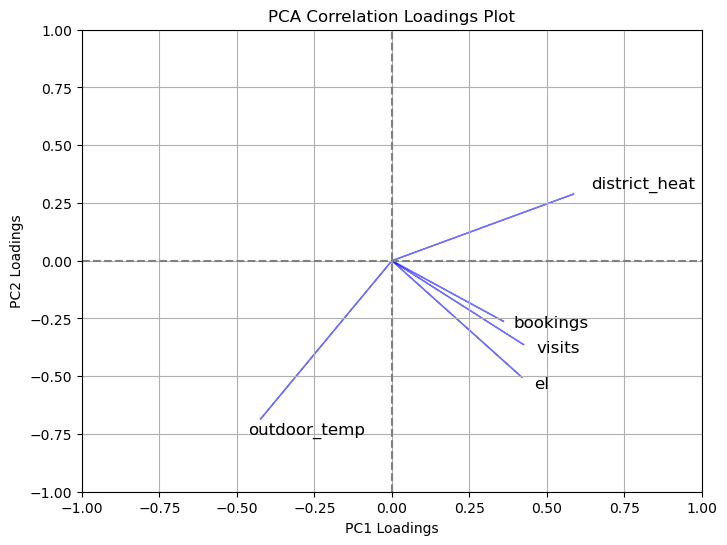

In [9]:
# **4. Correlation Loadings Plot**
plt.figure(figsize=(8, 6))
for i in range(len(data.drop(['location_label'], axis=1).columns)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='b', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, data.drop(['location_label'], axis=1).columns[i], fontsize=12)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("PCA Correlation Loadings Plot")
plt.grid()
plt.savefig("Correlation Loadings Plot.png", dpi=300, bbox_inches="tight")
plt.show()


El og district heat correlated along PC1, and oposite along PC2. 
District heat correlated to visits because buldings uses more district heat when there are more people?

Loadings on the first two principal components:


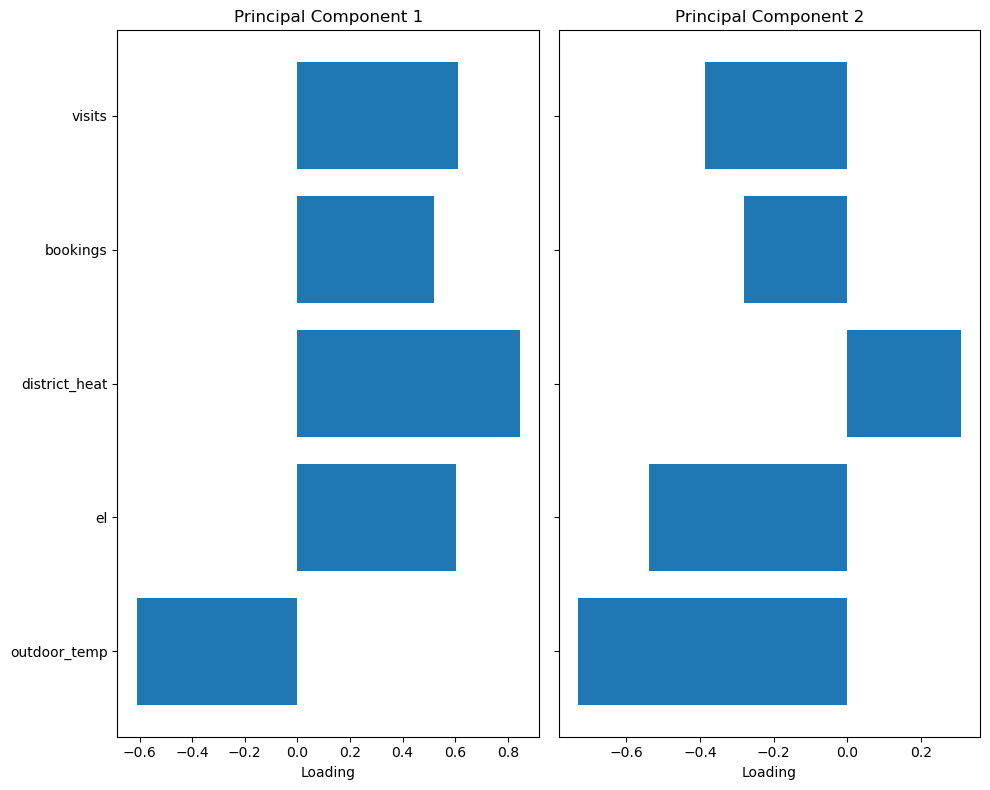

In [11]:
# Check the loadings on the first two principal components
# This will give some insight which original features contribute most to the 2 principal components
print("Loadings on the first two principal components:")
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
num_features = len(data.drop(['location_label'], axis=1).columns)

for i in range(2):
    ax[i].barh(range(num_features), loadings[:, i])
    ax[i].set_yticks(range(num_features))
    ax[i].set_yticklabels(data.drop(['location_label'], axis=1).columns)
    ax[i].set_title(f"Principal Component {i+1}")
    ax[i].set_xlabel("Loading")

fig.tight_layout()
plt.show()
